In [53]:
#Get a list of categories
import requests
import json

url_cat = "https://api.sketchfab.com/v3/categories"


response = requests.get(url_cat)
if response.status_code == 200:
    cat = response.json()

categories = {}

for res in cat["results"]:
    categories[res["name"]] = [res['slug']]

for key in categories.keys():
    print(key)


Animals & Pets
Architecture
Art & Abstract
Cars & Vehicles
Characters & Creatures
Cultural Heritage & History
Electronics & Gadgets
Fashion & Style
Food & Drink
Furniture & Home
Music
Nature & Plants
News & Politics
People
Places & Travel
Science & Technology
Sports & Fitness
Weapons & Military


In [71]:
import requests
import json

# Replace with your access token
access_token = "49c1affe7fd04c8aa5972714d2026619"

#Category
category = "Food & Drink"
cat_uid = categories[category]

#Tag
tag = "bottle"

# Replace with the actual model UID
model_uid = ""

url = "https://api.sketchfab.com/v3/models"
query_params = {
    "sort_by": "-viewCount",
    "categories": cat_uid,
    "downloadable": "true",
    "archives_flavours": "false"
}
if tag != "":
    query_params["tags"] = tag

response = requests.get(url, params=query_params)


if response.status_code == 200:
    data = response.json()

# Number of models to download
n = 3
uids = []
names = []
for i in range(n):
    uids.append(data["results"][i]["uid"])
    names.append(data["results"][i]["name"])
urls = []
for uid in uids:
    print(uid)
    model_uid = uid
    # # API endpoint for download request
    url_dl = f"https://api.sketchfab.com/v3/models/{model_uid}/download"
    # # Make a GET request with the authorization header
    response = requests.get(url_dl, headers={"Authorization": f"Token {access_token}"})
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        download_data = json.loads(response.text)
        
        # Get the URL for the glTF file
        gltf_url = download_data["gltf"]["url"]

    else:
        # Print the error message
        print("Request failed:", response.text)
    urls.append(gltf_url)

8e88320ad1994e0392a253fb9f31c70f
da5f6f2fa06541048a4bcbe0ba8eac2c
efa1c4c1f2a947659ded2e61e20eff31


Download succeeded.
Unzipped HOXXOH GOLD


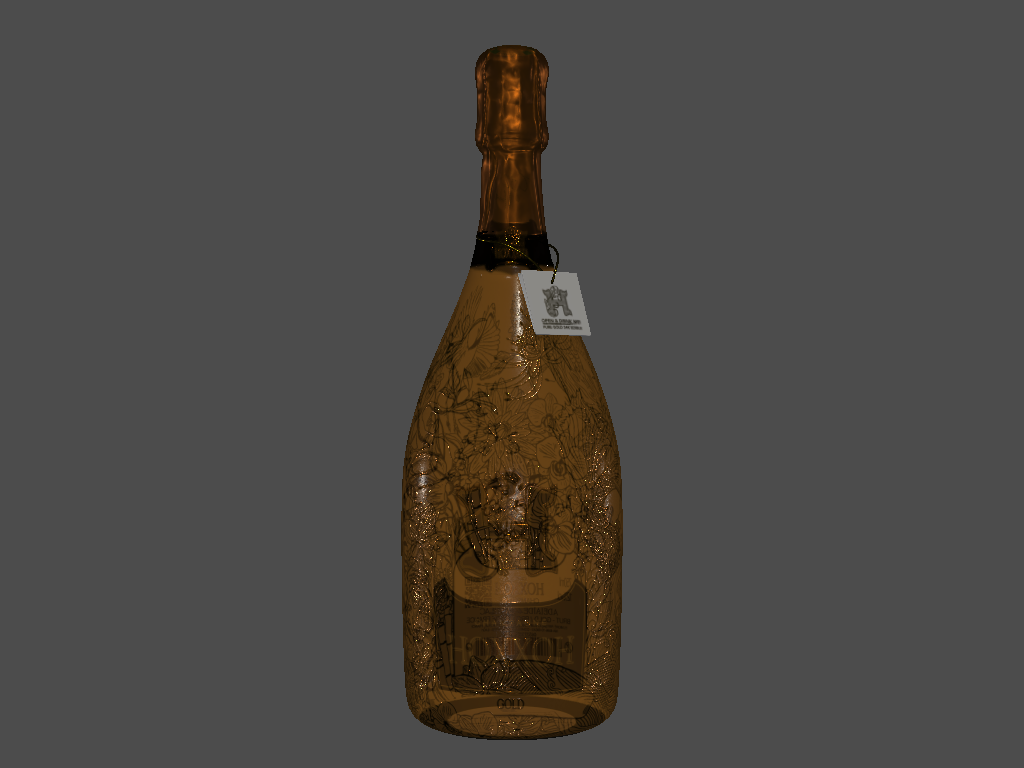

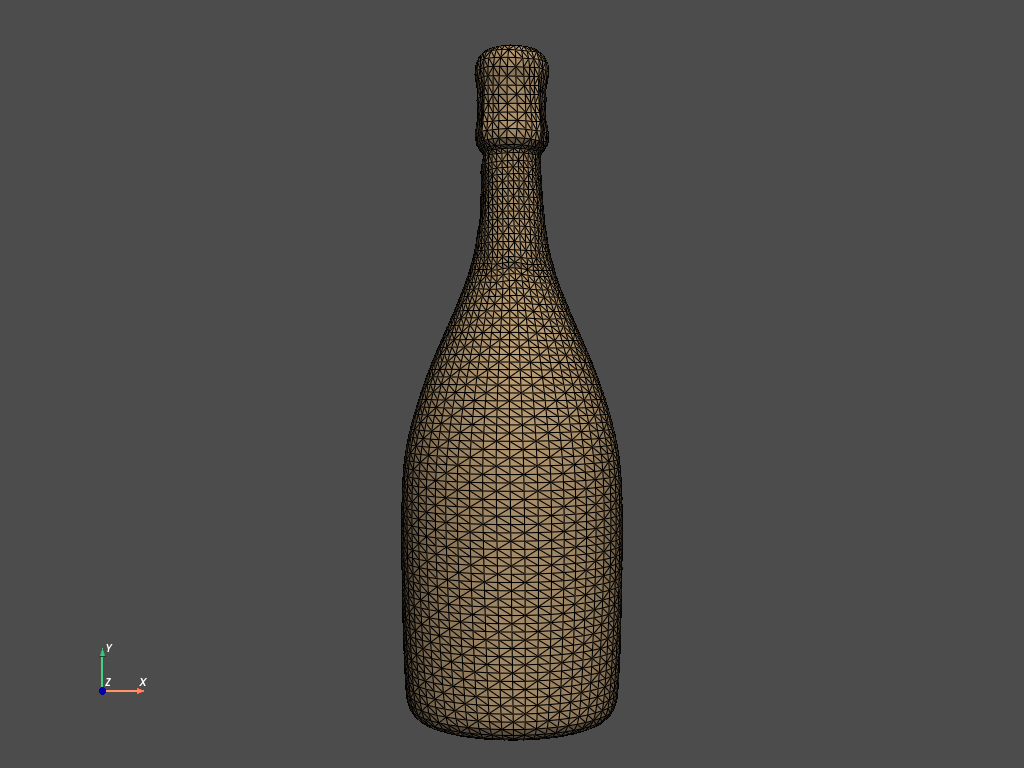

Download succeeded.
Unzipped HOXXOH RUBY


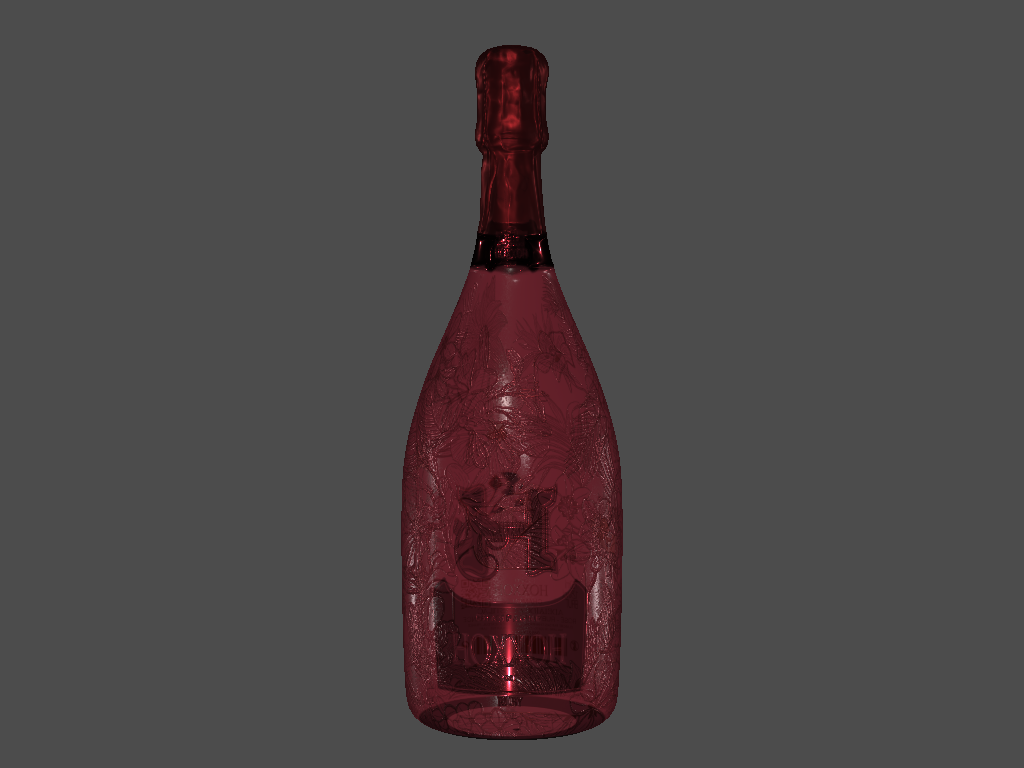

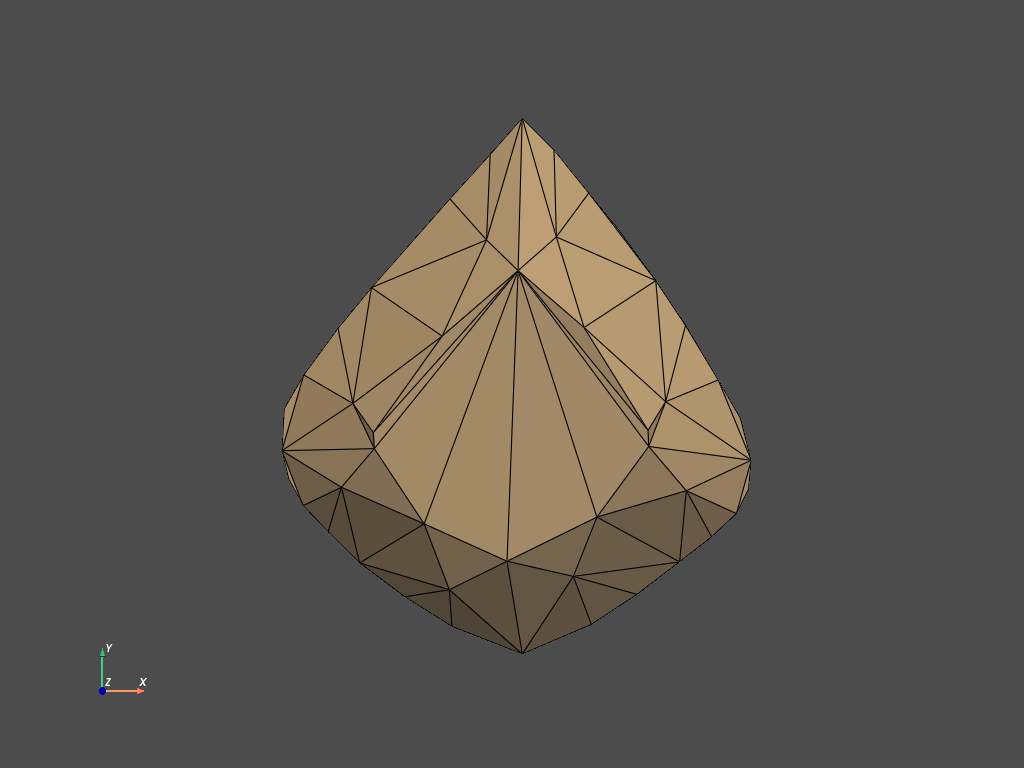

Download succeeded.
Unzipped Plastic Water Bottle


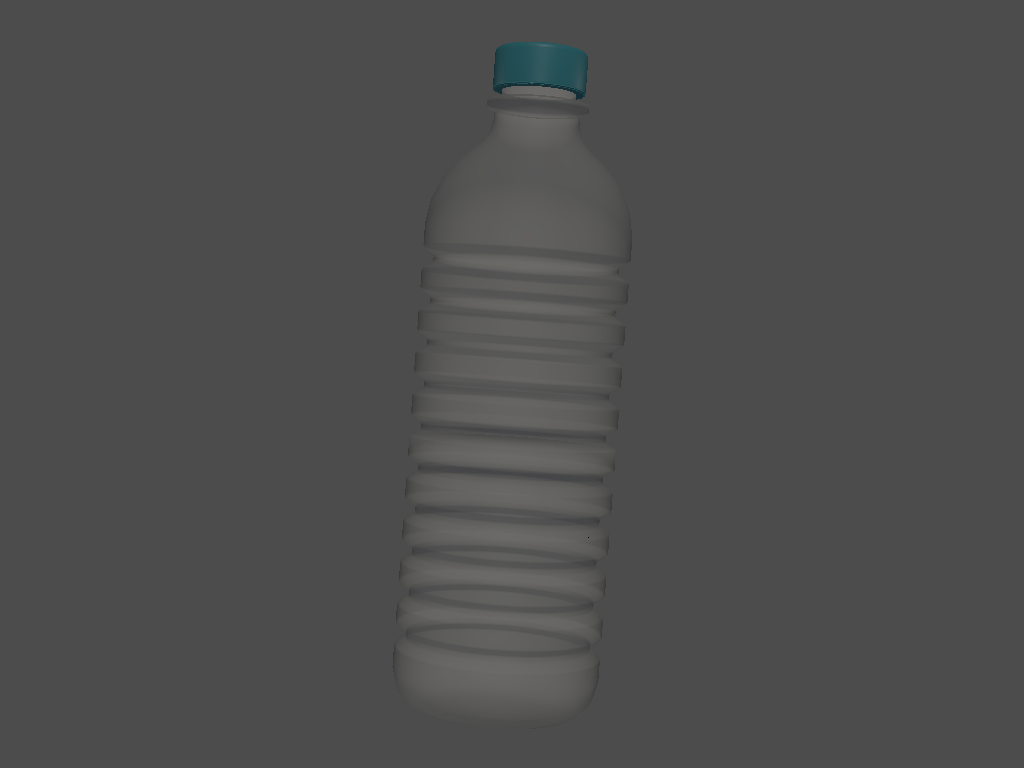

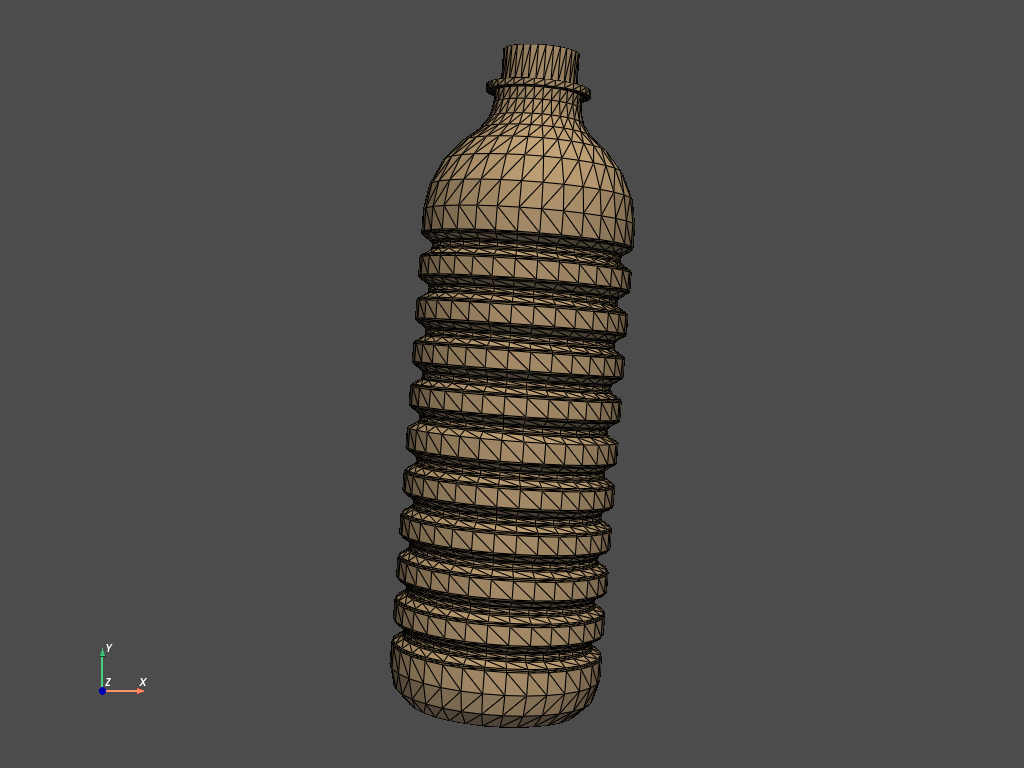

In [74]:
import zipfile
import os
import pyvista as pv

directory_name = "models"
parent_dir = os.getcwd()
path = os.path.join(parent_dir, directory_name)

if not os.path.exists(path):
    os.makedirs(path)

for i in range(n):
    name = names[i]
    PATH = f"models/{name}.zip"
    # Make a GET request to download the glTF file
    response = requests.get(urls[i])
    # Check if the request was successful
    if response.status_code == 200:
        # Save the response content to a file
        with open(PATH, "wb") as f:
            f.write(response.content)
        print("Download succeeded.")
        
        with zipfile.ZipFile((PATH), 'r') as zip_ref:
            model_folder = os.path.splitext(os.path.basename(PATH))[0]
            zip_ref.extractall("models/"+model_folder)
            print("Unzipped " + name)
        #mesh = pv.read(path + "/" + name + "/scene.gltf")
        #cpos = mesh.plot()
        pl = pv.Plotter()
        pl.import_gltf(path + "/" + name + "/scene.gltf")
        pl.camera.zoom(1)
        pl.show()

        block = pv.read(path + "/" + name + "/scene.gltf")
        mesh = block[0][0][0]
        mesh.plot(color='tan', show_edges=True, cpos='xy')
        os.remove(PATH)
    else:
        # Print the error message
        print("Download failed:", response.text)